In [1]:
from scipy.stats import poisson, norm
from scipy.special import factorial
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
time_arr, decay_arr = np.loadtxt('./Radioctive Activity-Fiesta Plate(3sec. Dwell).txt', skiprows=2, unpack=True)
background_arr = np.loadtxt('Background20min.txt')

mean_background = np.mean(background_arr/20 * 3)
combined_arr = np.copy(decay_arr)
combined_arr = combined_arr - mean_background

In [3]:
error_s = np.sqrt(decay_arr + mean_background)
combined_error_arr = np.mean(error_s)

In [4]:
rate_arr = combined_arr / 3
rate_error_arr = np.sqrt(np.mean(combined_arr)) / 3

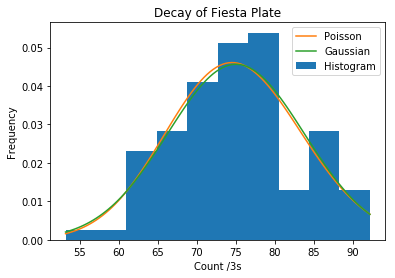

In [5]:
x = np.linspace(min(combined_arr), max(combined_arr), 100)

#plotting the poisson distribution
def poisson1(x, mean):
    return np.exp(-1 * mean) * mean ** (x) / factorial(x)

plt.hist(combined_arr, bins=10, density=True, label='Histogram')
plt.plot(x, poisson1(x, np.mean(combined_arr)), label='Poisson')

#plotting the gaussian distribution
def gaussian(x, sigma, mu):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))


plt.plot(x, gaussian(x, combined_error_arr, np.mean(combined_arr)), label='Gaussian')

plt.xlabel('Count /3s')
plt.ylabel('Frequency')
plt.title('Decay of Fiesta Plate')
plt.legend()

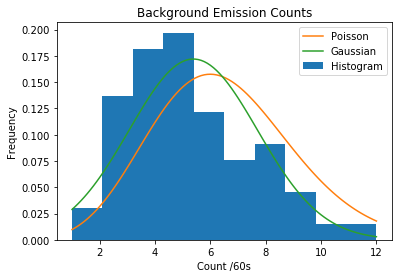

In [6]:
b = np.linspace(min(background_arr), max(background_arr), 100)
plt.hist(background_arr, bins=10, density=True, label='Histogram')
plt.plot(b, poisson1(b, np.mean(b)), label='Poisson')

background_error_arr = np.sqrt(np.mean(background_arr))
plt.plot(b, gaussian(b, background_error_arr, np.mean(background_arr)), label='Gaussian')

plt.xlabel('Count /60s')
plt.ylabel('Frequency')
plt.title('Background Emission Counts')
plt.legend()